In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

from models import LegacySeq2Seq, MixedSeq2Seq, DynamicSeq2Seq
from data_providers import MultiTSDataProvider

%matplotlib inline

## Sine wave learning
 * good hyperparams: batch_size 50, num_hidden 35, optimizer RMSProp, learning_rate 0.007 -- gets down to ~0.6 (total error), with report error avg = 10 each epoch takes ~ 1.5 s for MixedSeq2Seq
 * Adam does much less well.

In [30]:
n_cond = 30
n_pred = 30
batch_size = 50
num_hidden = 35

# rnn = LegacySeq2Seq(n_cond, n_pred, num_hidden, n_layers=2, optimizer='RMSProp', learning_rate=0.007)
rnn = MixedSeq2Seq(n_cond, n_pred, num_hidden, n_layers=2,
                   optimizer='RMSProp', learning_rate=0.007, teacher_forcing_ratio=.8)
# rnn = DynamicSeq2Seq(n_cond, n_pred, num_hidden, n_layers=2,
#                      batch_size=batch_size, optimizer='RMSProp', learning_rate=0.007)

In [ ]:
rnn.restore_session('checkpoints/2017-09-07_22-43-52-30-30/model.ckpt-6.meta')

In [3]:
base_dir = '../data/'
full_df = pd.read_csv(base_dir+'train_1.csv').fillna(0)
X = np.log1p(full_df.drop('Page', axis=1).values)
scaler = StandardScaler()
# discussion on which scaler to use here: https://www.kaggle.com/c/web-traffic-time-series-forecasting/discussion/38274
# each ts should have 0 mean and unit variance
# since the time series are the 'features' being scaled, transpose first
X = scaler.fit_transform(X.T).T
n_ts = None
train_data = MultiTSDataProvider(X,
                                 n_ts=n_ts, 
                                 n_cond=n_cond, 
                                 n_pred=n_pred, 
                                 stride_length=-1,
                                 batch_size=batch_size)
val_data = MultiTSDataProvider(X,
                               n_ts=n_ts,
                               n_cond=n_cond,
                               n_pred=n_pred,
                               which_set='val',
                               batch_size=batch_size)

(145063, 490)
(145063, 30) (145063, 30)
(145063, 60)
(145063, 30) (145063, 30)


In [31]:
# rnn.train(train_data, val_data, epochs=100, keep_prob=0.7, save=True)
rnn.train_sine(epochs=250, report_error_avg=10, batch_size=50)
# 29.71 for legacy
# 100 hidden 100 batch size gets down to 0.037

Elapsed time 3.042006015777588 seconds
End of epoch 1: running error average = 19.584
                     mean error average = 0.314
                     val error average = 9.722
Elapsed time 1.6711039543151855 seconds
End of epoch 2: running error average = 9.314
                     mean error average = 0.318
                     val error average = 9.688
Elapsed time 1.674617052078247 seconds
End of epoch 3: running error average = 9.248
                     mean error average = 0.322
                     val error average = 9.419
Elapsed time 1.8084440231323242 seconds
End of epoch 4: running error average = 9.033
                     mean error average = 0.317
                     val error average = 9.492
Elapsed time 1.7358849048614502 seconds
End of epoch 5: running error average = 9.135
                     mean error average = 0.321
                     val error average = 9.898
Elapsed time 1.6872999668121338 seconds
End of epoch 6: running error average = 9.158
          

Elapsed time 1.6342830657958984 seconds
End of epoch 47: running error average = 5.968
                     mean error average = 0.325
                     val error average = 9.292
Elapsed time 1.612515926361084 seconds
End of epoch 48: running error average = 3.106
                     mean error average = 0.323
                     val error average = 9.608
Elapsed time 1.6182770729064941 seconds
End of epoch 49: running error average = 3.507
                     mean error average = 0.315
                     val error average = 11.763
Elapsed time 1.6292028427124023 seconds
End of epoch 50: running error average = 6.936
                     mean error average = 0.323
                     val error average = 9.407
Elapsed time 1.6953620910644531 seconds
End of epoch 51: running error average = 3.989
                     mean error average = 0.333
                     val error average = 9.640
Elapsed time 1.7245838642120361 seconds
End of epoch 52: running error average = 2.473
   

Elapsed time 1.6449470520019531 seconds
End of epoch 93: running error average = 3.615
                     mean error average = 0.329
                     val error average = 9.619
Elapsed time 1.6375041007995605 seconds
End of epoch 94: running error average = 5.330
                     mean error average = 0.313
                     val error average = 8.995
Elapsed time 1.7419419288635254 seconds
End of epoch 95: running error average = 4.165
                     mean error average = 0.319
                     val error average = 9.616
Elapsed time 1.6733448505401611 seconds
End of epoch 96: running error average = 3.090
                     mean error average = 0.308
                     val error average = 10.116
Elapsed time 1.7385458946228027 seconds
End of epoch 97: running error average = 1.640
                     mean error average = 0.318
                     val error average = 10.185
Elapsed time 1.6896250247955322 seconds
End of epoch 98: running error average = 4.114
 

Elapsed time 1.793431043624878 seconds
End of epoch 138: running error average = 6.144
                     mean error average = 0.325
                     val error average = 10.450
Elapsed time 1.7737360000610352 seconds
End of epoch 139: running error average = 5.970
                     mean error average = 0.312
                     val error average = 9.222
Elapsed time 1.650442123413086 seconds
End of epoch 140: running error average = 5.509
                     mean error average = 0.327
                     val error average = 9.233
Elapsed time 1.6321001052856445 seconds
End of epoch 141: running error average = 4.014
                     mean error average = 0.326
                     val error average = 9.641
Elapsed time 1.6997029781341553 seconds
End of epoch 142: running error average = 6.570
                     mean error average = 0.318
                     val error average = 9.211
Elapsed time 1.6469509601593018 seconds
End of epoch 143: running error average = 4.20

Elapsed time 1.8729898929595947 seconds
End of epoch 183: running error average = 5.049
                     mean error average = 0.324
                     val error average = 8.770
Elapsed time 1.9371190071105957 seconds
End of epoch 184: running error average = 4.260
                     mean error average = 0.316
                     val error average = 24.494
Elapsed time 2.017577886581421 seconds
End of epoch 185: running error average = 2.829
                     mean error average = 0.322
                     val error average = 8.716
Elapsed time 1.88167405128479 seconds
End of epoch 186: running error average = 6.886
                     mean error average = 0.317
                     val error average = 9.220
Elapsed time 1.97483491897583 seconds
End of epoch 187: running error average = 5.042
                     mean error average = 0.320
                     val error average = 9.305
Elapsed time 1.8456239700317383 seconds
End of epoch 188: running error average = 4.989
 

Elapsed time 1.827003002166748 seconds
End of epoch 228: running error average = 2.499
                     mean error average = 0.319
                     val error average = 8.871
Elapsed time 1.8530848026275635 seconds
End of epoch 229: running error average = 3.049
                     mean error average = 0.319
                     val error average = 9.574
Elapsed time 1.6823081970214844 seconds
End of epoch 230: running error average = 4.744
                     mean error average = 0.320
                     val error average = 16.201
Elapsed time 1.8023569583892822 seconds
End of epoch 231: running error average = 5.538
                     mean error average = 0.320
                     val error average = 9.472
Elapsed time 1.7822749614715576 seconds
End of epoch 232: running error average = 3.117
                     mean error average = 0.318
                     val error average = 8.607
Elapsed time 1.8837101459503174 seconds
End of epoch 233: running error average = 2.7

In [25]:
rnn.saver.save(rnn.sess, 'checkpoints/rnnfourier/model.ckpt')

'checkpoints/rnnfourier/model.ckpt'

In [26]:
rnn = MixedSeq2Seq(n_cond, n_pred, num_hidden, n_layers=2, learning_rate=)

In [32]:
from datasets import generate_x_y_data_v3
# input_batch, target_batch = val_data.next()
input_batch, target_batch = generate_x_y_data_v3(True, batch_size)
input_batch = input_batch.reshape(input_batch.shape[0],-1).T
target_batch = target_batch.reshape(target_batch.shape[0],-1).T
# preds = rnn.predict(input_batch, target_batch)

0


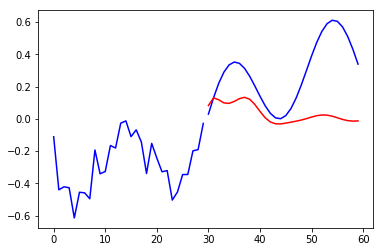

1


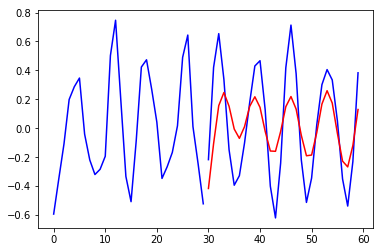

2


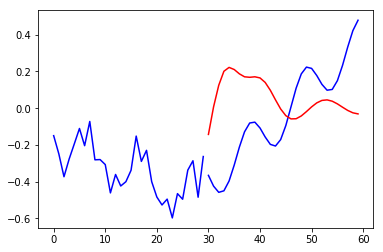

3


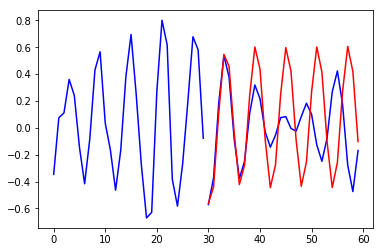

4


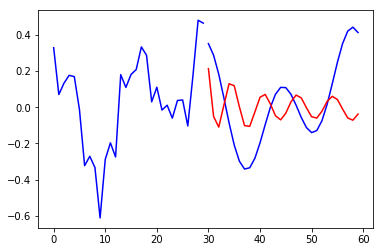

5


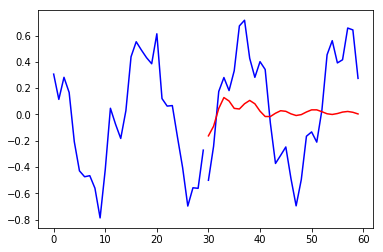

6


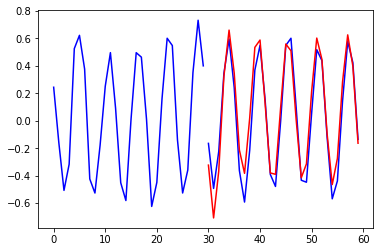

7


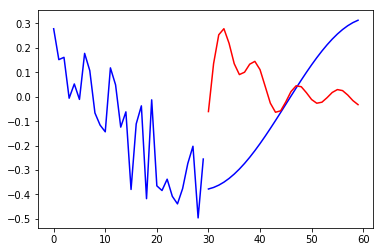

8


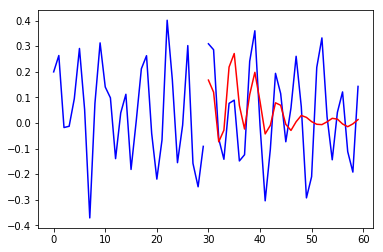

9


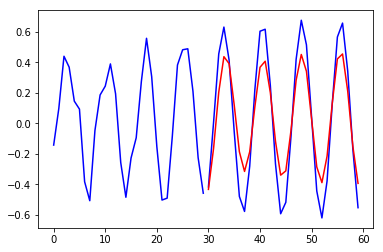

In [35]:
# rnn.view_preds(input_batch, target_batch, one_step=True)
rnn.view_preds(input_batch, target_batch, one_step=False)
# https://github.com/guillaume-chevalier/seq2seq-signal-prediction